<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/11_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第11章 モデル推定

## 例題11.3

scikit-learn付属のirisデータからsepallength（0次元目）とsepalwidth（1次元目）特徴を抜き出して2次元教師なしデータを作成し、クラスタリングを行います。

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans

(1)データの読み込み、(2)0次元目と1次元目の抜き出し を行います。

In [2]:
iris = load_iris()
X = iris.data[:,0:2]

正解データのプロット

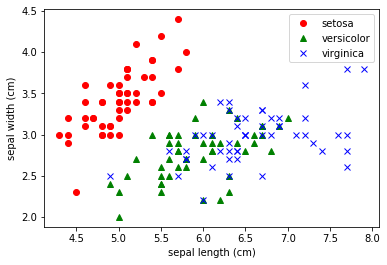

In [3]:
y = iris.target
co = ['ro', 'g^', 'bx']
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names)

### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数が3になったところで処理を止めます。

In [4]:
ac=AgglomerativeClustering(n_clusters=3)
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

散布図をプロットして結果を確認します。

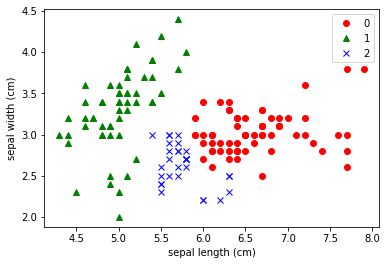

In [5]:
y = ac.labels_
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(3))

### k-meansクラスタリング

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数3は予め与えておく必要があります。

In [6]:
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

散布図をプロットして結果を確認します。

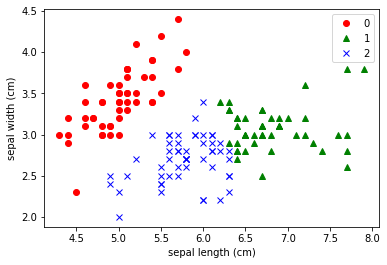

In [7]:
y = km.labels_
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(3))

## 例題11.5

### クラスタ数決定の自動化 Affinity Propagation

 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

In [8]:
from sklearn.cluster import AffinityPropagation

ap=AffinityPropagation()
ap.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

apインスタンスのcluster_centers\_属性の値は、クラスタ中心のリストです。


In [9]:
ap.cluster_centers_indices_

array([  2,  17,  33,  52,  57,  87,  94,  97, 115, 117, 130])

散布図をプロットして結果を確認します。

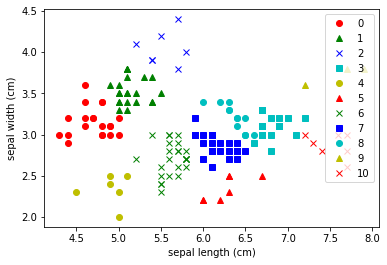

In [10]:
y = ap.labels_
co2 = ['rgbcy'[i%5]+'o^xs'[i%4] for i in range(20)]
for t, c in zip(set(y),co2):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(len(ap.cluster_centers_)))

パラメータpreferenceは各データの中心としての選ばれやすさを表すので、負の値を設定すれば、その絶対値に応じてクラスタ数が少なくなります。

In [11]:
ap2 = AffinityPropagation(preference=-18)
ap2.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=-18, verbose=False)

In [12]:
ap2.cluster_centers_indices_

array([ 49,  73, 125])

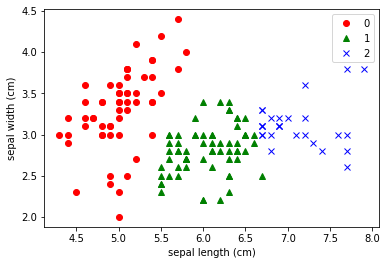

In [13]:
y = ap2.labels_
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(len(ap2.cluster_centers_)))

## 例題11.8

### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数は3としておきます。

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

各正規分布のパラメータは、gmmインスタンスのmeans\_属性とcovariances\_属性にリスト形式で格納されています。

In [15]:
print('means')
print(gmm.means_)
print('covariances:')
print(gmm.covariances_)

means
[[5.01507898 3.4514463 ]
 [6.68055626 3.02849627]
 [5.9009976  2.74387546]]
covariances:
[[[0.11944714 0.08835648]
  [0.08835648 0.11893388]]

 [[0.36153508 0.05159664]
  [0.05159664 0.08927917]]

 [[0.27671149 0.08897036]
  [0.08897036 0.09389206]]]


結果の表示は[サンプルコード](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py)を参考にしてください。

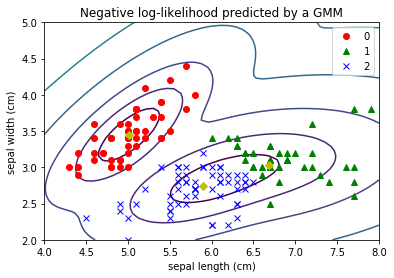

In [16]:
from matplotlib.colors import LogNorm

xa = np.linspace(4, 8)
ya = np.linspace(2, 5)
Xa, Ya = np.meshgrid(xa, ya)
XX = np.array([Xa.ravel(), Ya.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(Xa.shape)
plt.contour(Xa, Ya, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))

y = gmm.predict(X)
for t, c in zip(set(y),co):
    plt.plot(X[y==t,0], X[y==t,1], c)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(range(3))

plt.plot(gmm.means_[:,0], gmm.means_[:,1], 'yD')
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

## 演習問題11.3

クラスタリング結果の評価をします。Adjusted rand score は正解ラベルと同じクラスタとなったデータの割合を，偶然にそのクラスタに分類される割合で補正したものです．

In [17]:
from sklearn.metrics import adjusted_rand_score

print("AgglomerativeClustering: %0.2f" % adjusted_rand_score(iris.target, ac.labels_))
print("KMeans: %0.2f" % adjusted_rand_score(iris.target, km.labels_))
print("AffinityPropagation: %0.2f" % adjusted_rand_score(iris.target, ap2.labels_))
print("GaussianMixture: %0.2f" % adjusted_rand_score(iris.target, gmm.predict(X)))

AgglomerativeClustering: 0.51
KMeans: 0.60
AffinityPropagation: 0.47
GaussianMixture: 0.55
